## Antes de comenzar 

In [41]:
import os
HOME = os.getcwd()
print(HOME)
DATA_LOCATION = os.path.join(HOME, "data")
print(DATA_LOCATION)


/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection
/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data


In [42]:
# Libreria para quitar el resultado de código que no es necesario
%pip install -q gwpy
! pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


## Instalación YOLOv8

⚠️ **DISCLAIMER** -> YOLOv8 está aún en pleno desarrollo. Y se introducen cambios casi semanalmente. Lo que podría llevar a errores en el cuaderno.

In [43]:
%pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
Setup complete ✅ (10 CPUs, 64.0 GB RAM, 243.9/1858.2 GB disk)


In [44]:
from ultralytics import YOLO

from IPython.display import display, Image

# Comienza el entrenamiento

In [45]:
!yolo task=detect mode=train model=yolov8m.pt data={DATA_LOCATION}/data.yaml epochs=100 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.0.117 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=Fal

In [46]:
!ls {HOME}/runs/detect/train/

F1_curve.png
PR_curve.png
P_curve.png
R_curve.png
args.yaml
confusion_matrix.png
events.out.tfevents.1686812177.Antonios-MBP.54203.0
labels.jpg
labels_correlogram.jpg
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


# Matriz de confusión

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection


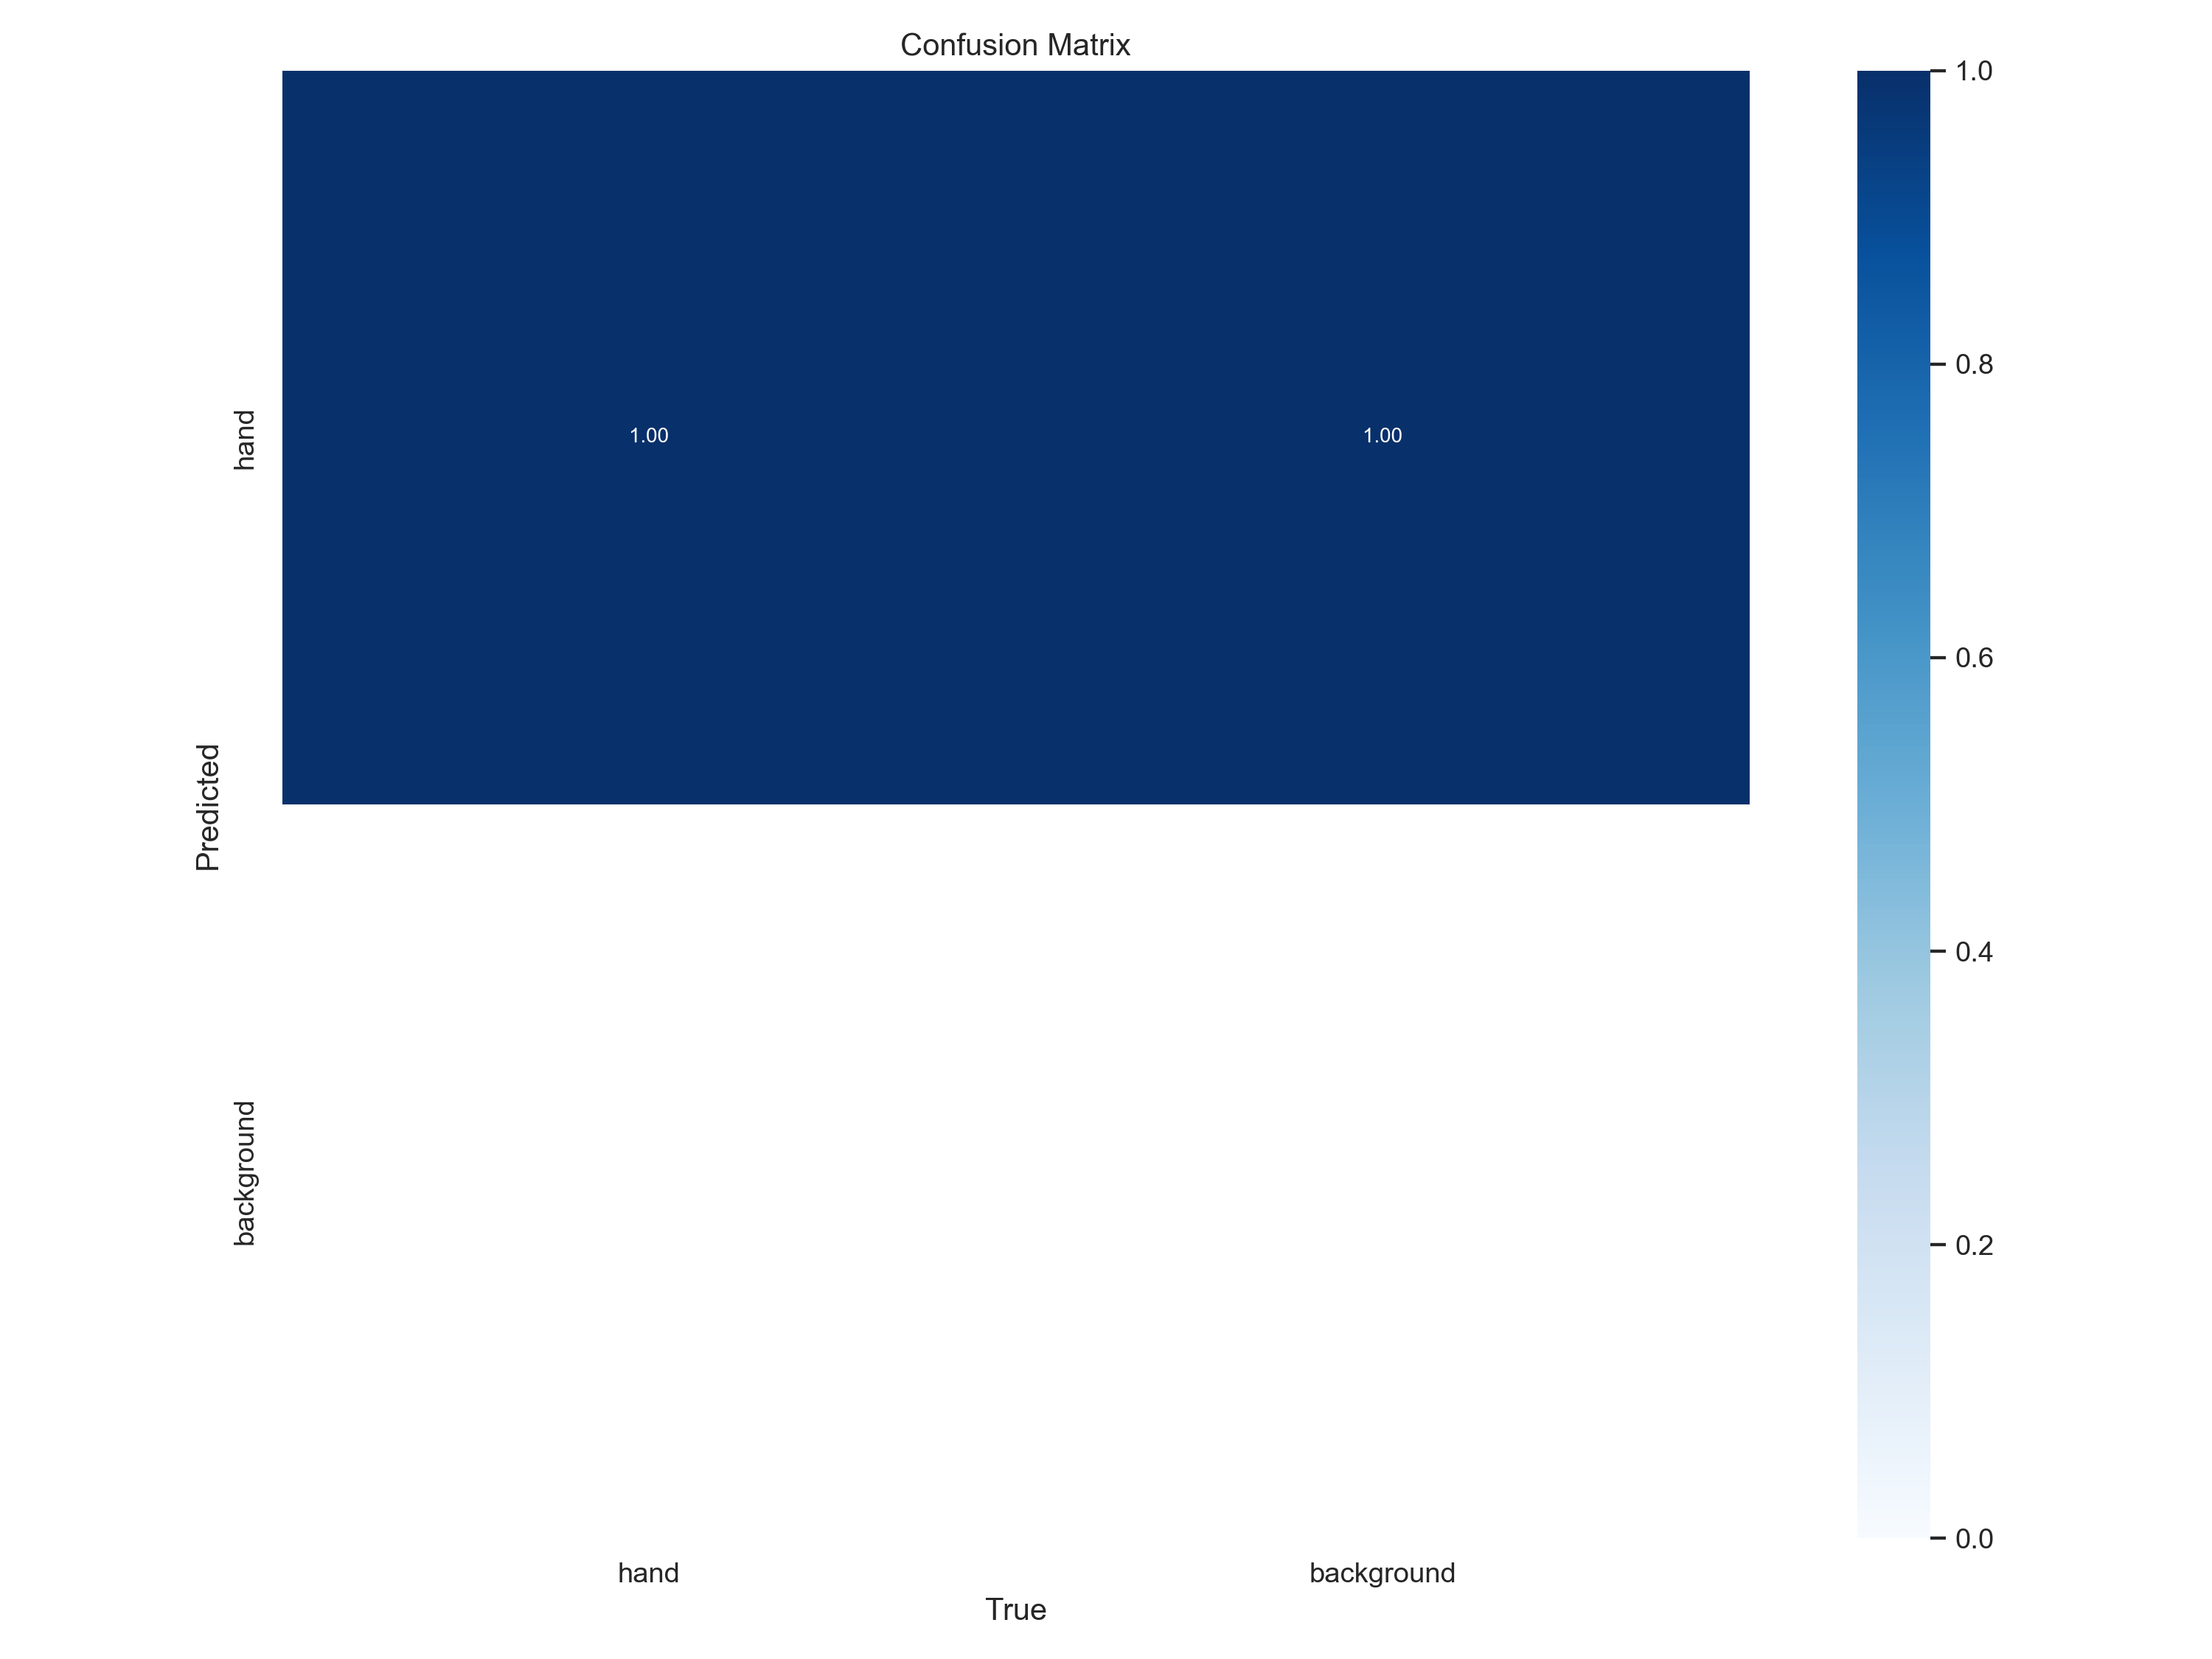

In [47]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# Pérdida de entrenamiento y validación

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection


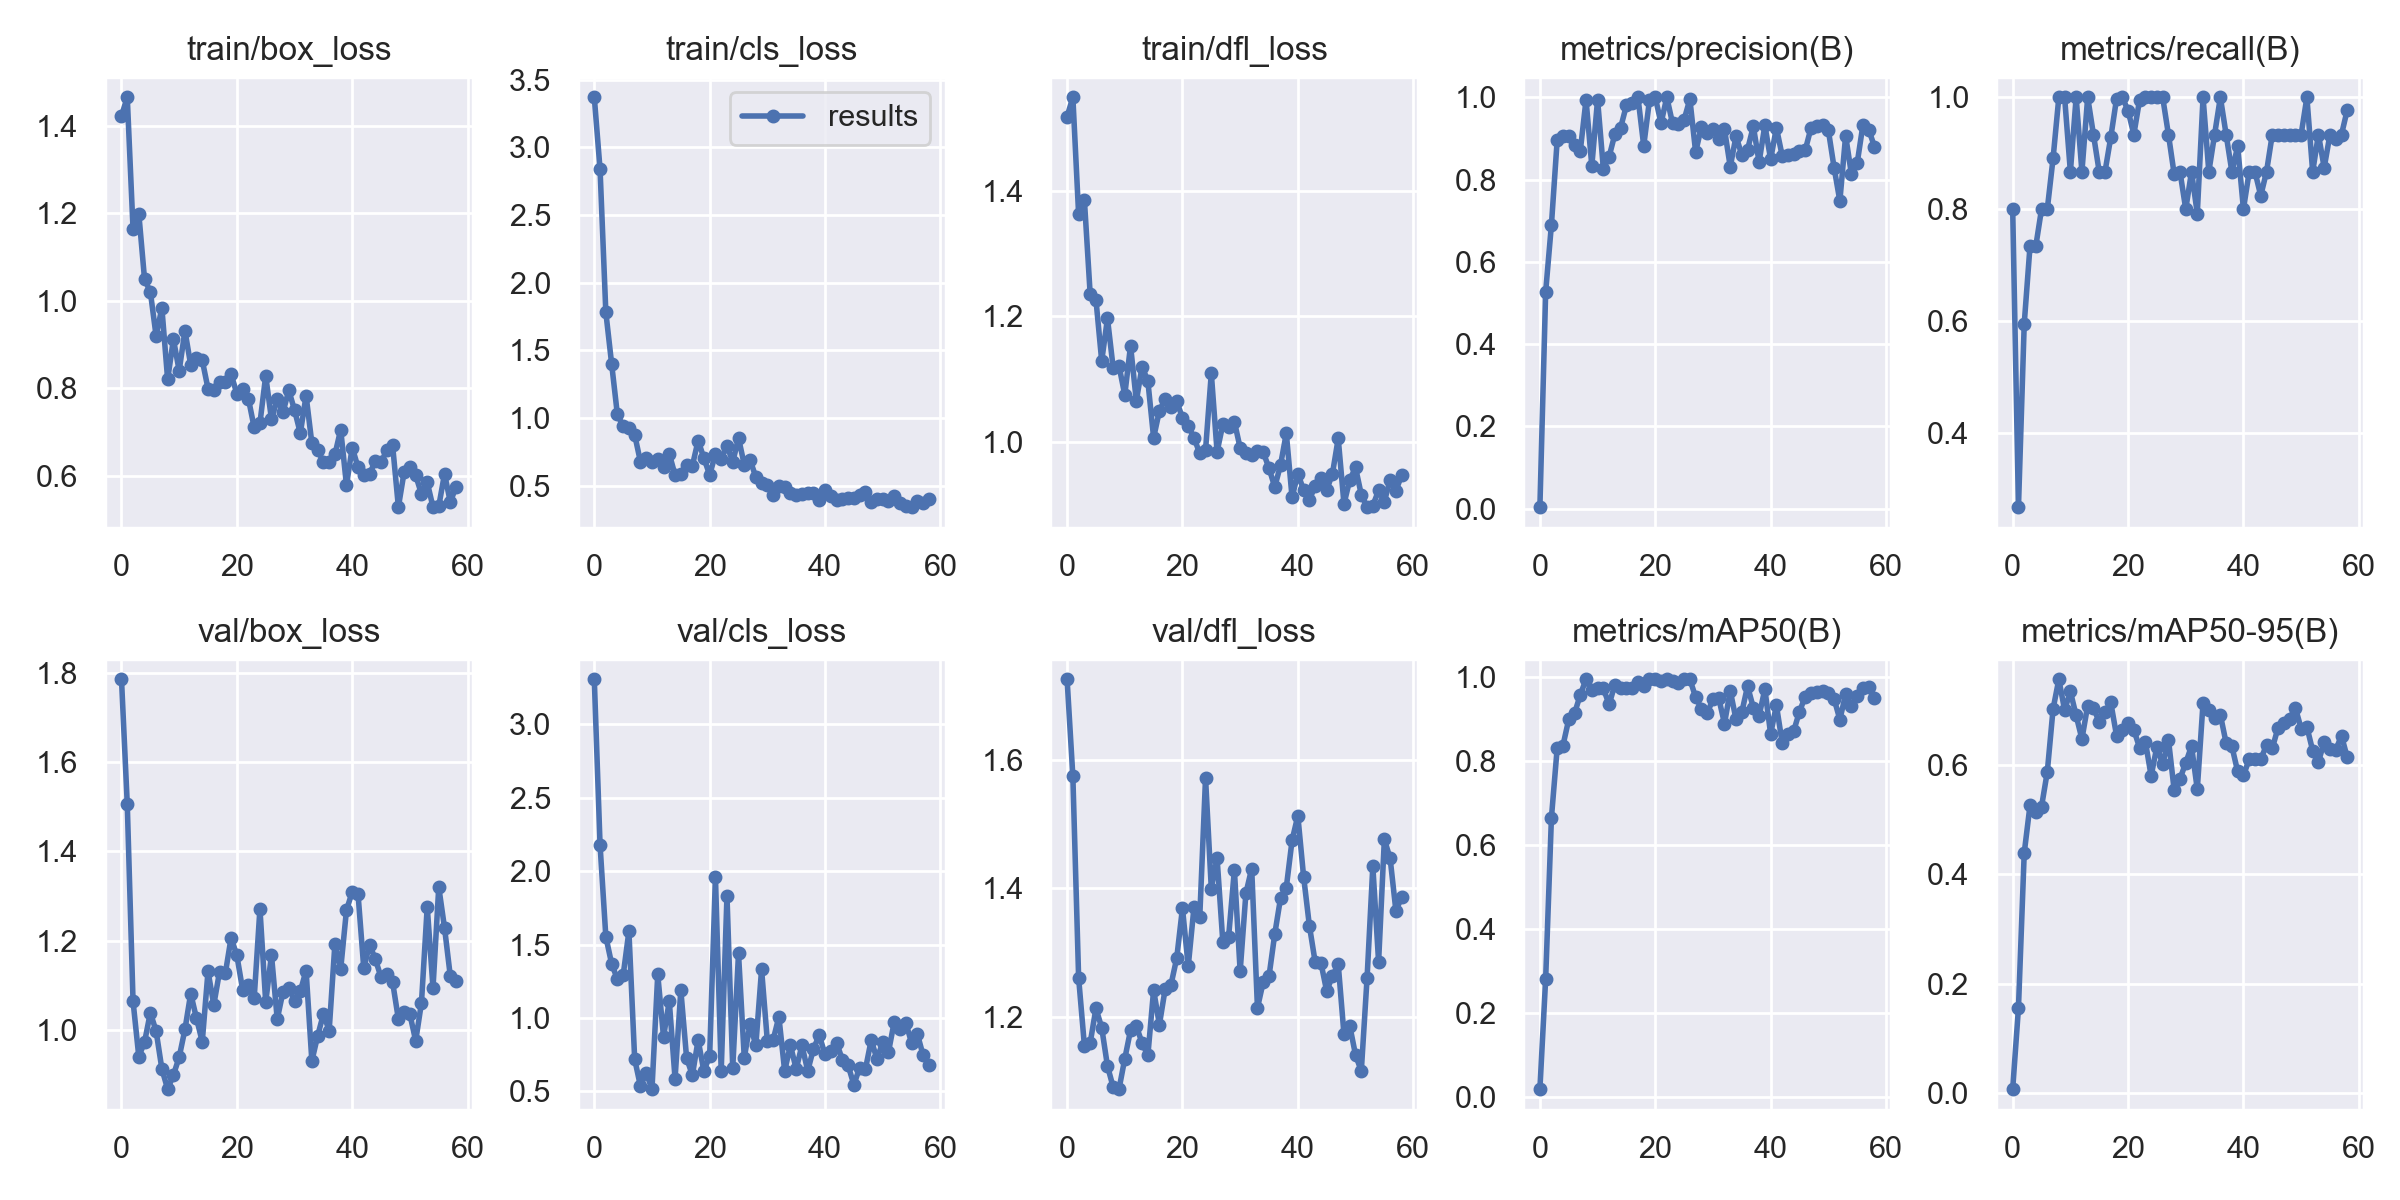

In [48]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection


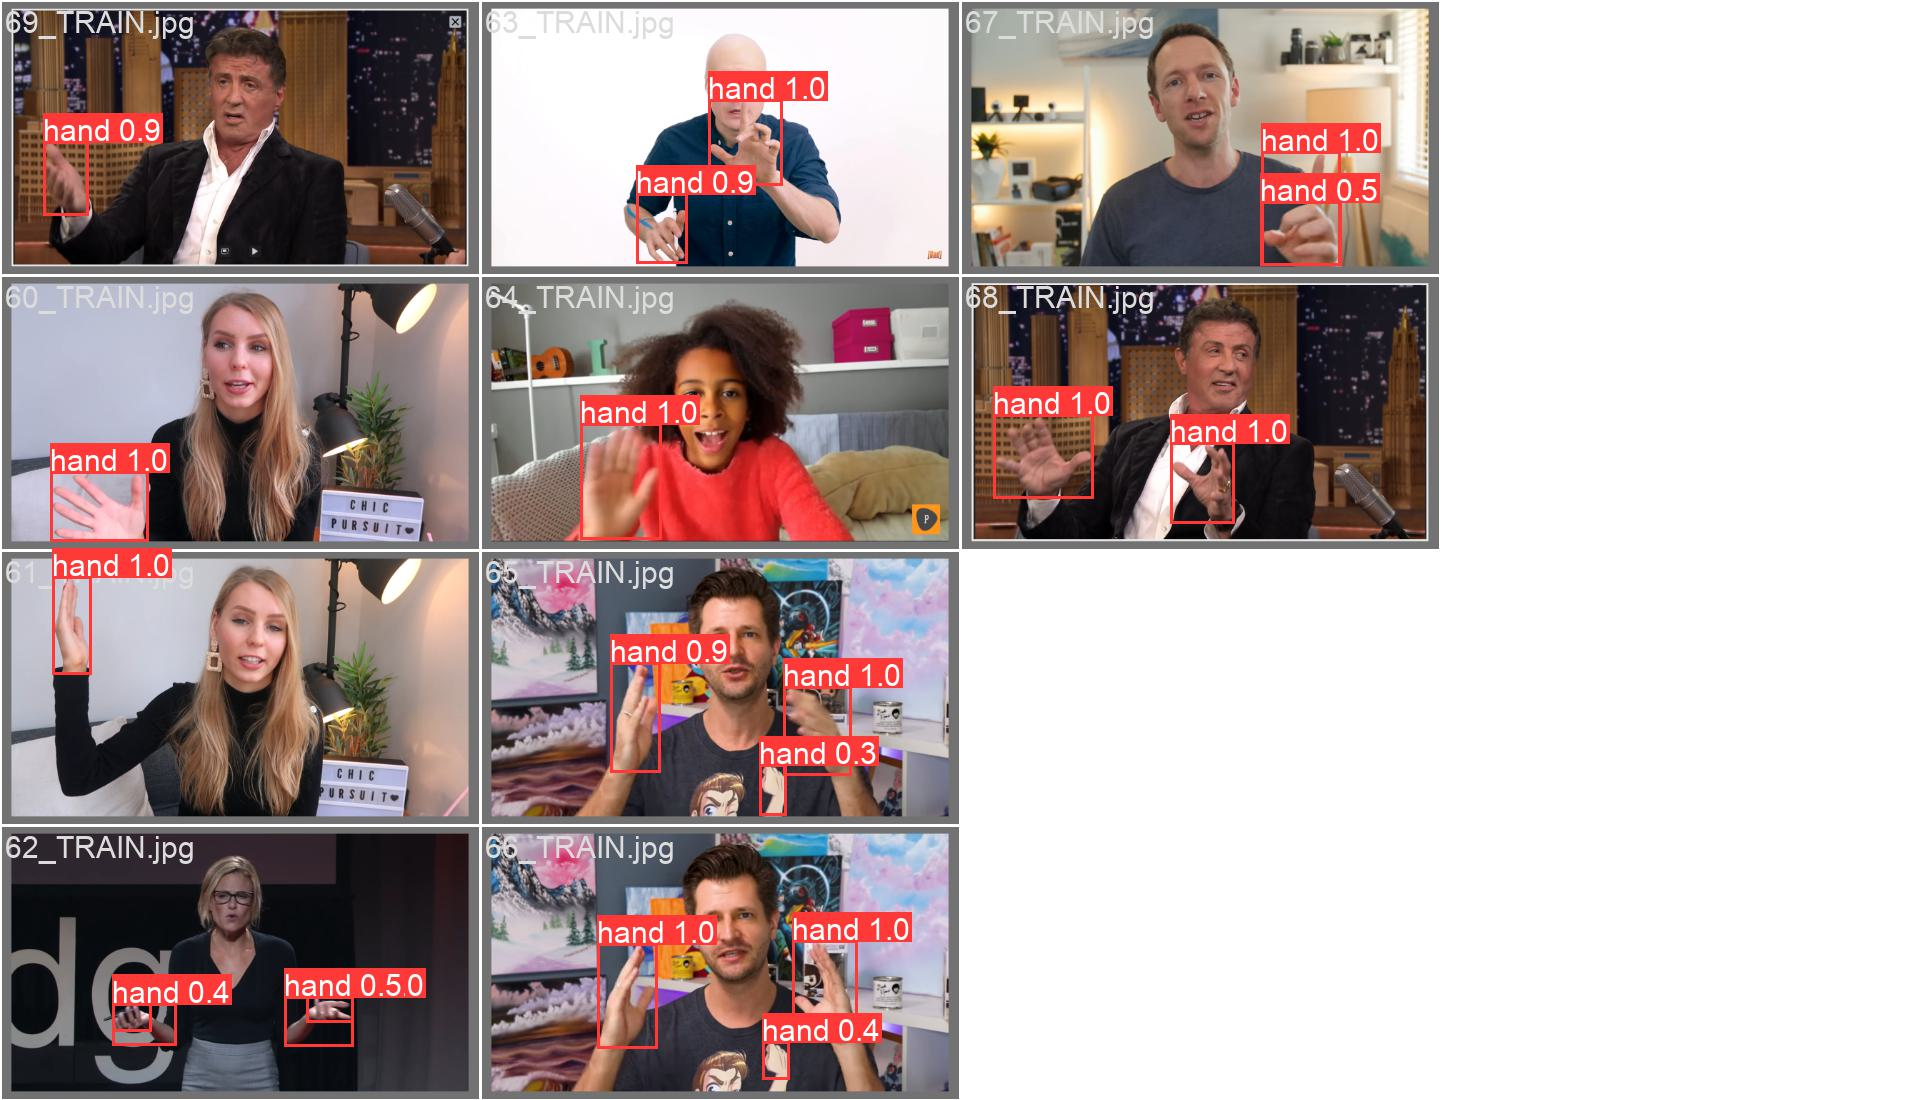

In [49]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validación del modelo personalizado

In [50]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={DATA_LOCATION}/data.yaml

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection
Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         15      0.994          1      0.995      0.756
Speed: 2.1ms preprocess, 306.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val


# Inferencia del modelo personalizado

In [51]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={DATA_LOCATION}/test/images save=True

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection
Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/10.jpg: 448x640 2 hands, 537.6ms
image 2/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/11.jpg: 448x640 2 hands, 354.7ms
image 3/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/12.jpg: 448x640 2 hands, 438.3ms
image 4/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/13.jpg: 448x640 1 hand, 370.0ms
image 5/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/15.jpg: 448x640 1 hand, 335.7ms
image 6/18 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/data/test/images/16.jpg: 448x640 2 h

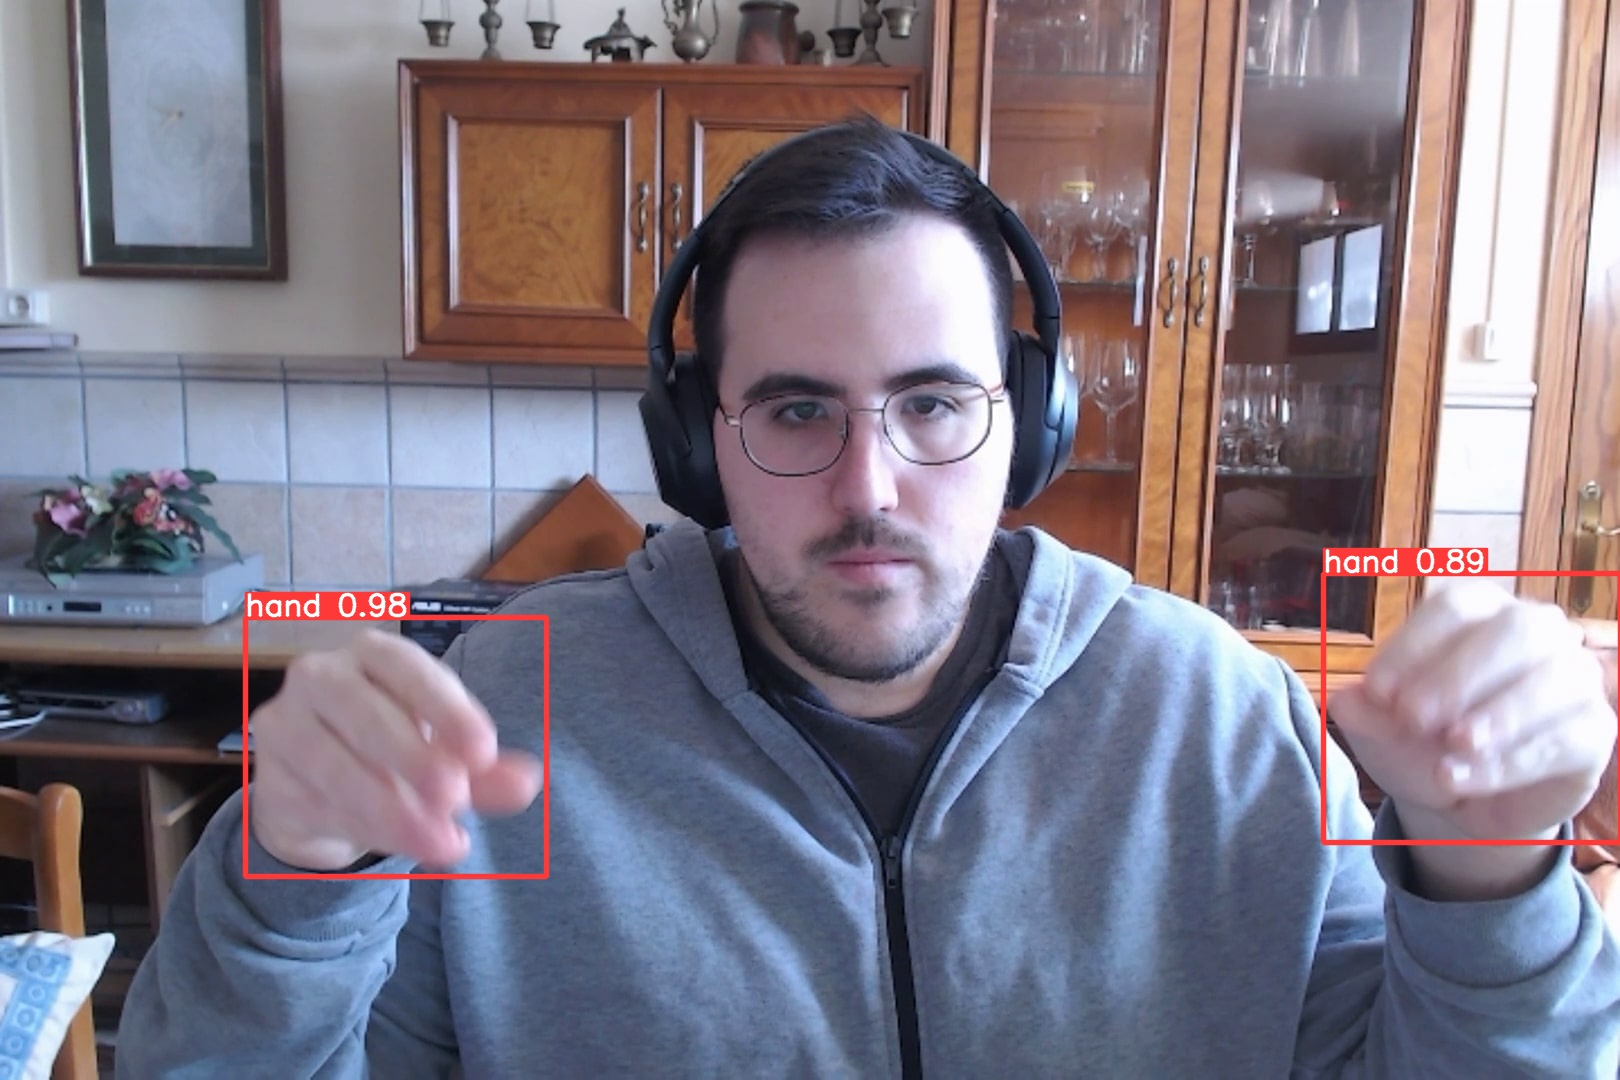

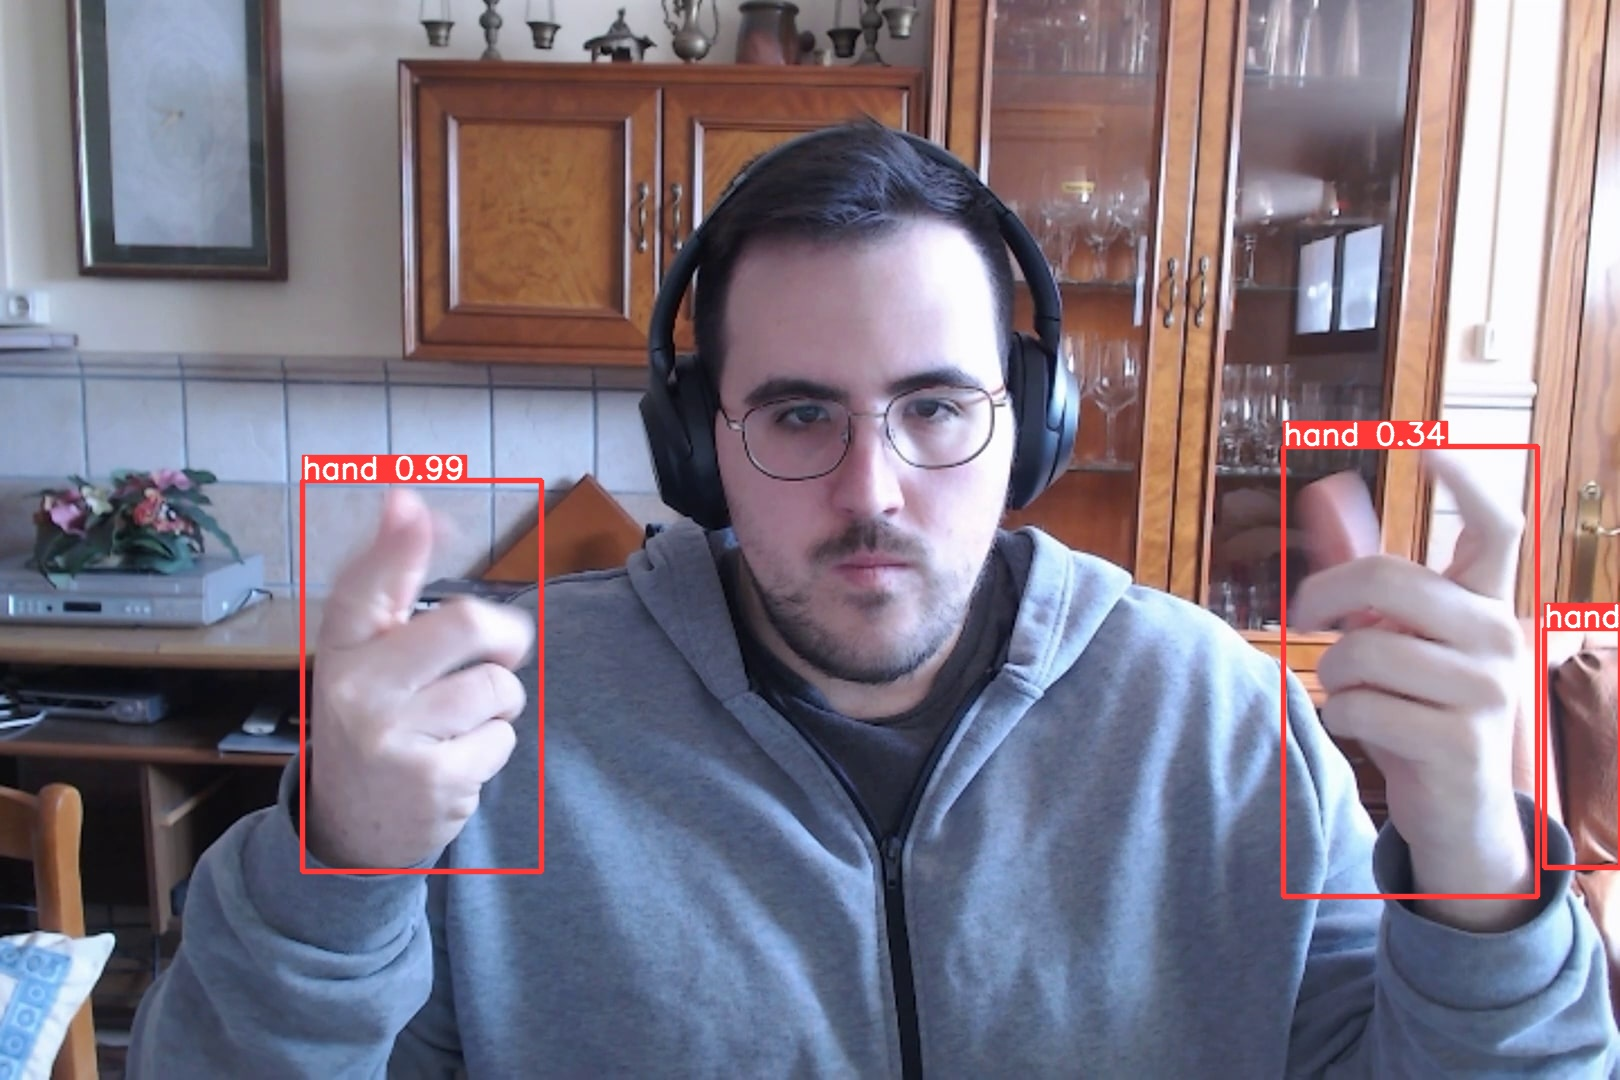

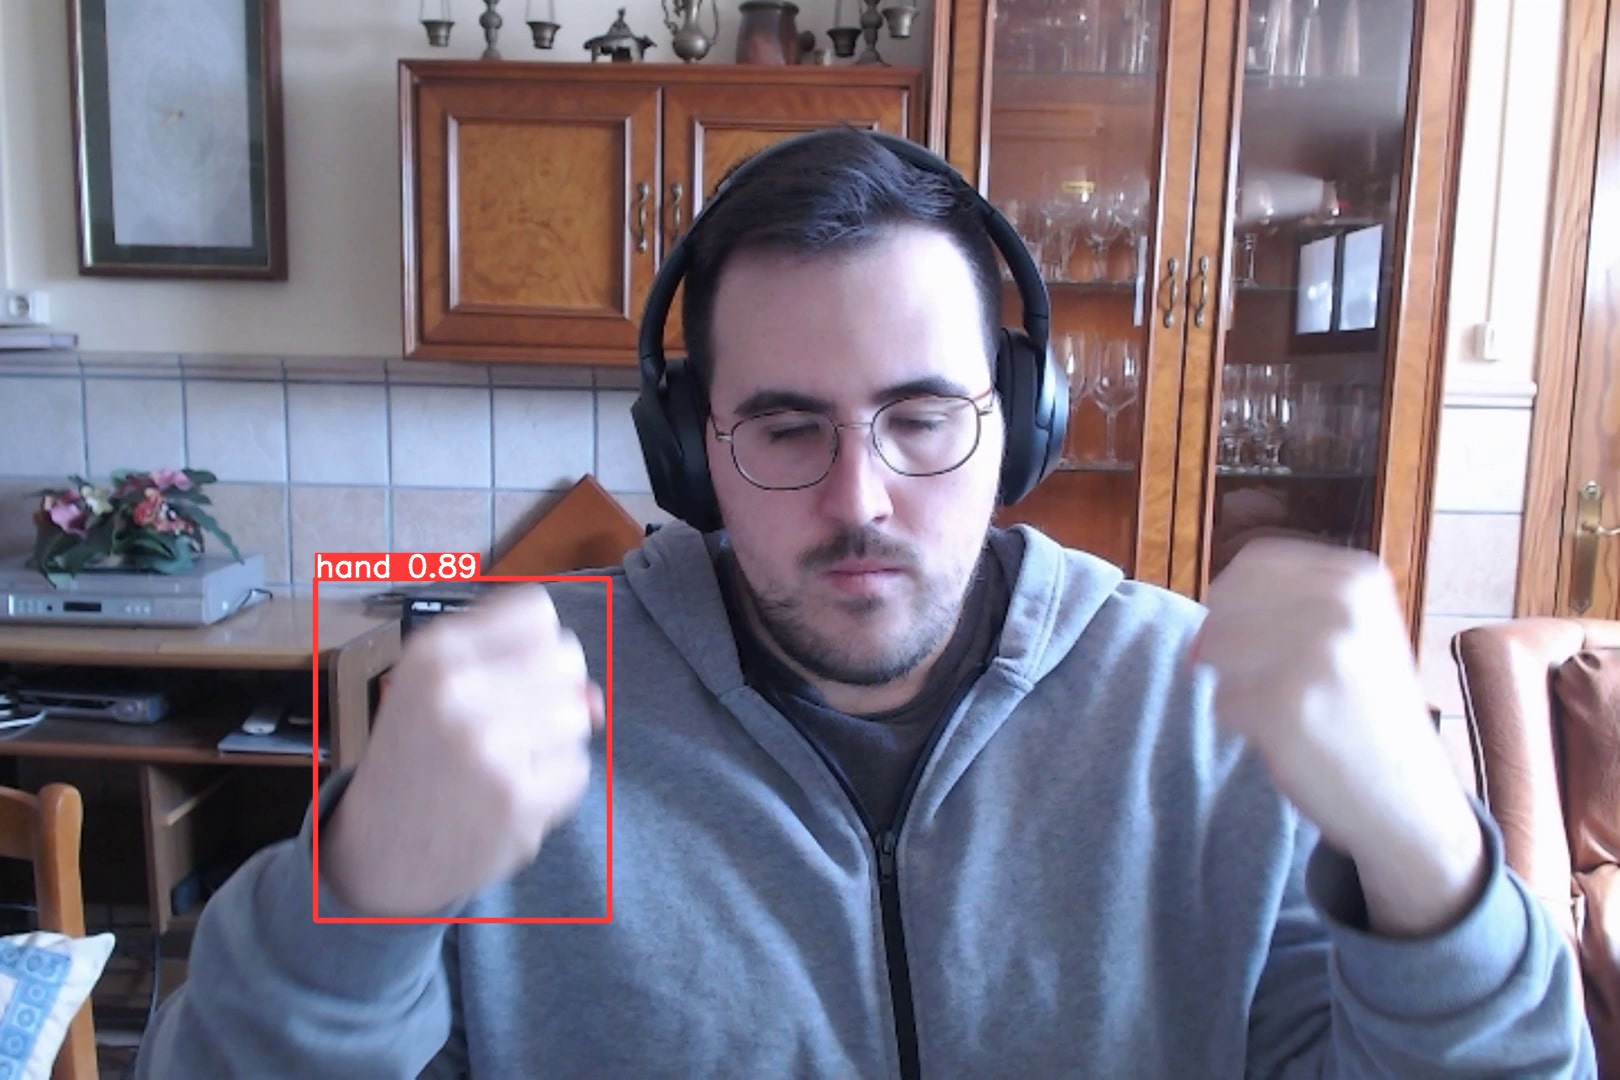

In [52]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Prueba con imagen aleatoria de Google Images

In [53]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='https://www.incimages.com/uploaded_files/image/1920x1080/getty_487484086_165811.jpg' save=True

/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection
Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

100%|████████████████████████████████████████| 280k/280k [00:00<00:00, 5.71MB/s]
image 1/1 /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/getty_487484086_165811.jpg: 384x640 1 hand, 487.6ms
Speed: 1.3ms preprocess, 487.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection


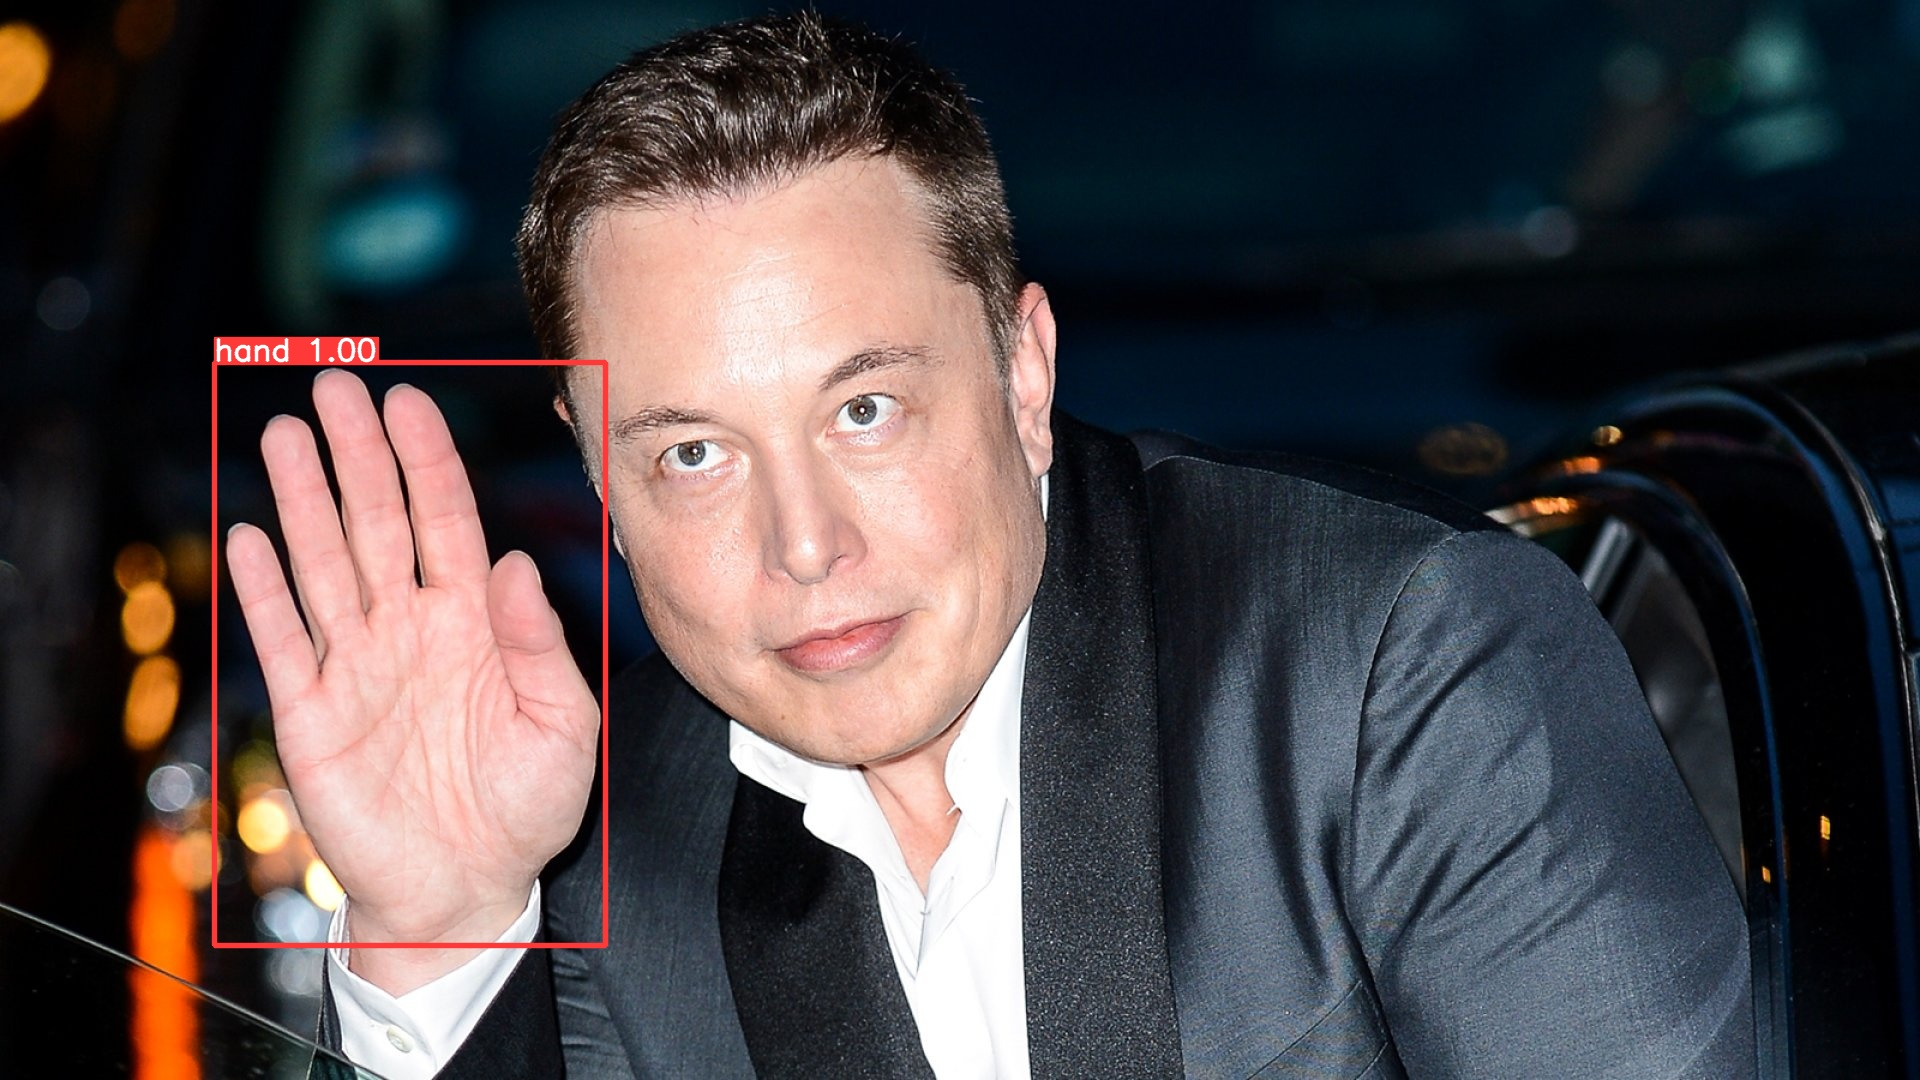

In [54]:
%cd {HOME}
Image(filename='runs/detect/predict2/getty_487484086_165811.jpg', height=600)

# Exportar modelo a Core ML para usarlo en iOS

In [55]:
%pip install coremltools

Note: you may need to restart the kernel to use updated packages.


In [56]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=coreml nms

Ultralytics YOLOv8.0.60 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from /Users/anesmu/Desktop/TFG/SIGN_GENIUS_IA/yolo8_hand_detection/runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)

CoreML: starting export with coremltools 6.2...
Tuple detected at graph output. This will be flattened in the converted model.
Converting PyTorch Frontend ==> MIL Ops: 100%|▉| 650/652 [00:00<00:00, 4134.28 o
Running MIL Clean up passes: 100%|████████| 11/11 [00:00<00:00, 106.59 passes/s]
Translating MIL ==> NeuralNetwork Ops:  96%|▉| 774/805 [00:02<00:00, 265.07 ops/Const anchor_points was already added.
Translating MIL ==> NeuralNetwork Ops: 100%|█| 805/805 [00:02<00:00, 317.59 ops/
CoreML Pipeline: starting pipeline with coremltools 6.2...
CoreML Pipeline: pipeline success
